In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing and exploring the Data

In [2]:
data = pd.read_csv(r'C:\Users\rajar\OneDrive\Desktop\Excel Folder\housing data.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
5,6,5,1993,796,SBrkr,1362,1,Attchd,2,480,MnPrv,Shed,143000
6,7,8,2004,1686,SBrkr,1694,2,Attchd,2,636,NaN,NaN,307000
7,8,7,1973,1107,SBrkr,2090,2,Attchd,2,484,NaN,Shed,200000
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
9,10,5,1965,1040,SBrkr,1040,1,Detchd,1,384,NaN,NaN,129500


In [5]:
print('No of Rows: ',data.shape[0])
print('No of Columns: ',data.shape[1])

No of records:  1418
No of columns:  13


In [6]:
data.tail()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125
1417,1418,5,1965,1256,SBrkr,1256,1,Attchd,1,276,NaN,NaN,147500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


From the above info we can see that there are missing values in Electrical, Garage Type,Fence, MiscFeatures

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


From the above describe we can get a Hint of outliers in TotalBsmtSF, GrLivArea,GarageArea, SalePrice

In [9]:
data.describe(include=object)

,Electrical,GarageType,Fence,MiscFeature
count,1417,1275,270,52
unique,5,6,4,4
top,SBrkr,Attchd,MnPrv,Shed
freq,1300,800,148,47


In [10]:
data.corr()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
Id,1.000000,-0.029188,-0.017960,-0.019396,0.002991,-0.000113,0.015633,0.014457,-0.029967
OverallQual,-0.029188,1.000000,0.584692,0.545747,0.592881,0.550112,0.609104,0.567796,0.791478
YearBuilt,-0.017960,0.584692,1.000000,0.396971,0.204757,0.478441,0.550275,0.492807,0.528006
TotalBsmtSF,-0.019396,0.545747,0.396971,1.000000,0.456365,0.326705,0.442614,0.495600,0.619852
GrLivArea,0.002991,0.592881,0.204757,0.456365,1.000000,0.626942,0.472139,0.470736,0.709503
FullBath,-0.000113,0.550112,0.478441,0.326705,0.626942,1.000000,0.473365,0.408453,0.562269
GarageCars,0.015633,0.609104,0.550275,0.442614,0.472139,0.473365,1.000000,0.884674,0.647676
GarageArea,0.014457,0.567796,0.492807,0.495600,0.470736,0.408453,0.884674,1.000000,0.627264
SalePrice,-0.029967,0.791478,0.528006,0.619852,0.709503,0.562269,0.647676,0.627264,1.000000


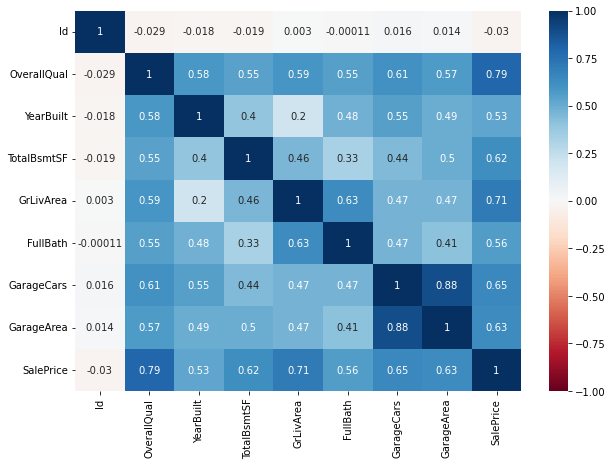

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, vmax=1,vmin=-1, cmap='RdBu')
plt.show()

In [12]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

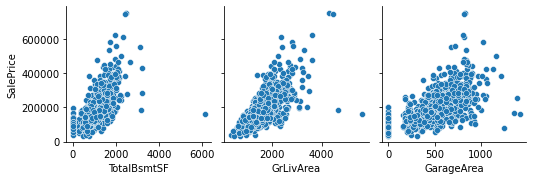

In [13]:
sns.pairplot(x_vars=['TotalBsmtSF', 'GrLivArea','GarageArea'],y_vars=['SalePrice'],data=data)
plt.show()

## Univariate and Bivariate Analysis

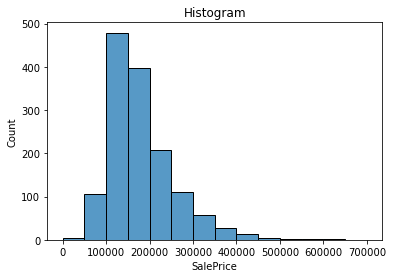

In [14]:
# Explare the Target Variable (SalePrice)
sns.histplot(data['SalePrice'],bins=range(0,750000,50000))
plt.title('Histogram')

plt.show()

Skewness:  1.8646120239750106
Kurtosis:  6.432852054835754


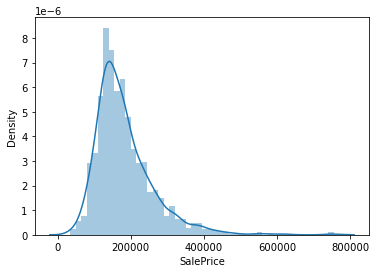

In [15]:
sns.distplot(data['SalePrice'])
print('Skewness: ',data['SalePrice'].skew())
print('Kurtosis: ',data['SalePrice'].kurt())
plt.show()

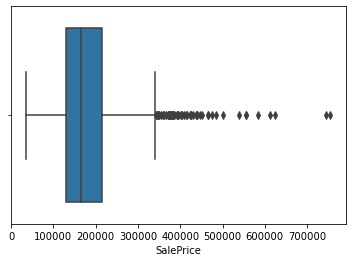

In [16]:
sns.boxplot(data['SalePrice'])
plt.show()

In [17]:
# Explore the SalePrice with some categorical columns (OverallQual,GarageType,Electrical)

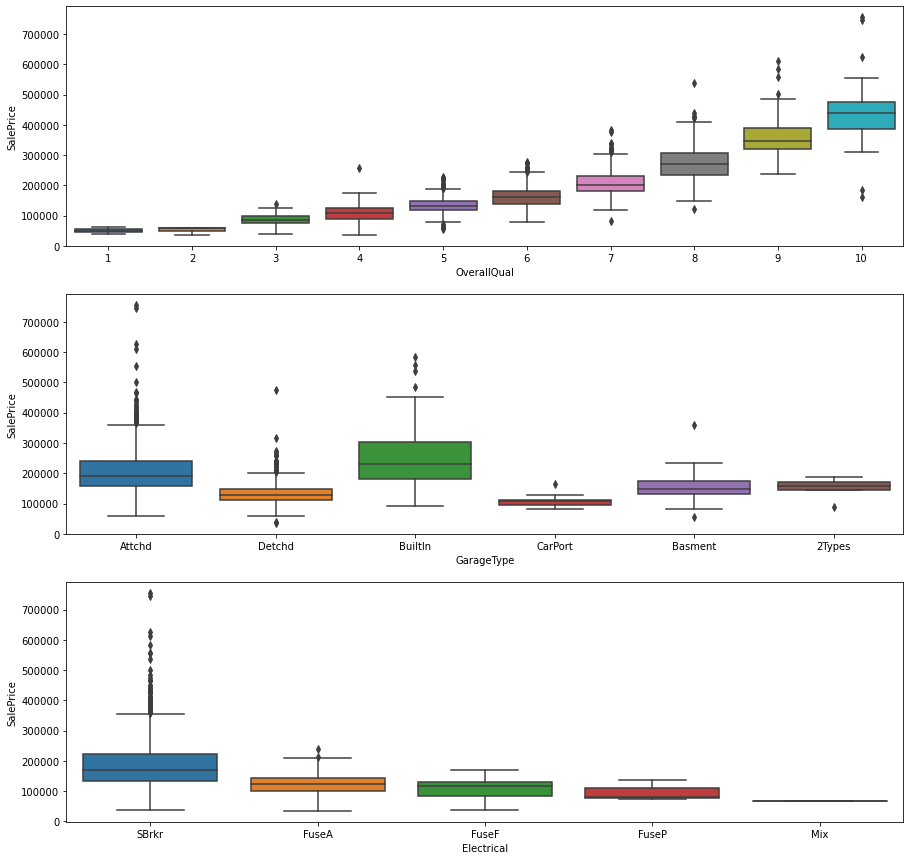

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.boxplot(x=data['OverallQual'],y=data['SalePrice'])
plt.subplot(3,1,2)
sns.boxplot(x=data['GarageType'],y=data['SalePrice'])
plt.subplot(3,1,3)
sns.boxplot(x=data['Electrical'],y=data['SalePrice'])
plt.show()

In [19]:
# Perform statistical test on SalePrice on the basis of overall quality

In [20]:
price_a = data[data['OverallQual']<=5]['SalePrice']
price_b = data[data['OverallQual']>5]['SalePrice']

In [21]:
from statsmodels.stats.weightstats import ztest,ttest_ind

In [22]:
# H0: There is no difference in Sample a and Sample b
# H1: The two samples are different

z_score,p_value = ztest(price_a,price_b)
print('z-score: ',z_score)
print('p-value: ',p_value)
if p_value<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

z-score:  -23.626614342802807
p-value:  2.0535400662857033e-123
Accept The H1:


In [23]:
data['GarageType'].value_counts()

Attchd     800
Detchd     354
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [24]:
data['GarageCars'].value_counts()

2    787
1    364
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [25]:
from scipy.stats import chi2_contingency

In [26]:
observed = pd.crosstab(data['GarageCars'],data['GarageType'])

In [27]:
# H0: The two columns Independent
# H1: The two columns are dependent

chi,p,dof,expected = chi2_contingency(observed)
print('Chi sq: ',chi)
print('p-value: ',p)
if p<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

Chi sq:  303.7522700344729
p-value:  9.277832977712945e-56
Accept The H1:


In [28]:
pd.DataFrame(expected)

,0,1,2,3,4,5
0,1.421176,189.490196,4.500392,20.607059,2.131765,83.849412
1,3.703529,493.803922,11.727843,53.701176,5.555294,218.508235
2,0.851765,113.568627,2.697255,12.350588,1.277647,50.254118
3,0.023529,3.137255,0.074510,0.341176,0.035294,1.388235


## Exploring and Treating the Missing Values

In [29]:
data.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [30]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [31]:
# First Let us treat the missing values in Electrical
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [32]:
data['Electrical'].mode()

0    SBrkr
dtype: object

In [33]:
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [34]:
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [35]:
# Next let us treat the Garage Type column

In [36]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [37]:
data['GarageType'].value_counts()

Attchd     800
Detchd     354
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [38]:
data['GarageType'] = np.where(data['GarageArea']==0,'NoGarage',data['GarageType'])

In [39]:
data_garagetype_null = data[data['GarageType'].isnull()]

In [40]:
data['GarageType'].value_counts()

Attchd      800
Detchd      354
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [41]:
data_garagetype_null['GarageCars'].value_counts()

1    62
Name: GarageCars, dtype: int64

In [42]:
data['GarageCars'].value_counts()

2    787
1    364
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [43]:
data[data['GarageCars']==1]['GarageType'].mode()

0    Detchd
dtype: object

In [44]:
data['GarageType'].fillna(data[data['GarageCars']==1]['GarageType'].mode()[0],inplace=True)

In [45]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [46]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
Electrical      0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageType      0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [47]:
data.drop(columns=['MiscFeature','Fence'],inplace=True)

In [48]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Id             0.0
OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

## Exploring and treating the outliers

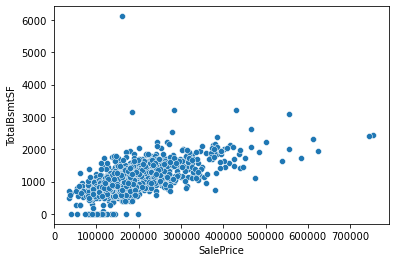

In [49]:
sns.scatterplot(x='SalePrice',y='TotalBsmtSF',data=data)
plt.show()

<AxesSubplot:xlabel='TotalBsmtSF'>

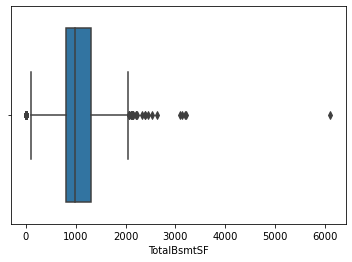

In [50]:
sns.boxplot(data['TotalBsmtSF'])

In [51]:
data[data['TotalBsmtSF']>5000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [52]:
data.drop(index=[1260],inplace=True)

<AxesSubplot:xlabel='TotalBsmtSF'>

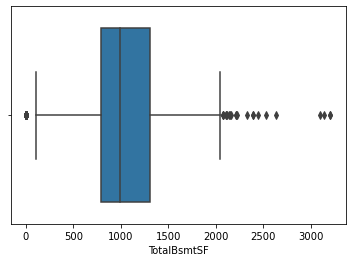

In [53]:
sns.boxplot(data['TotalBsmtSF'])

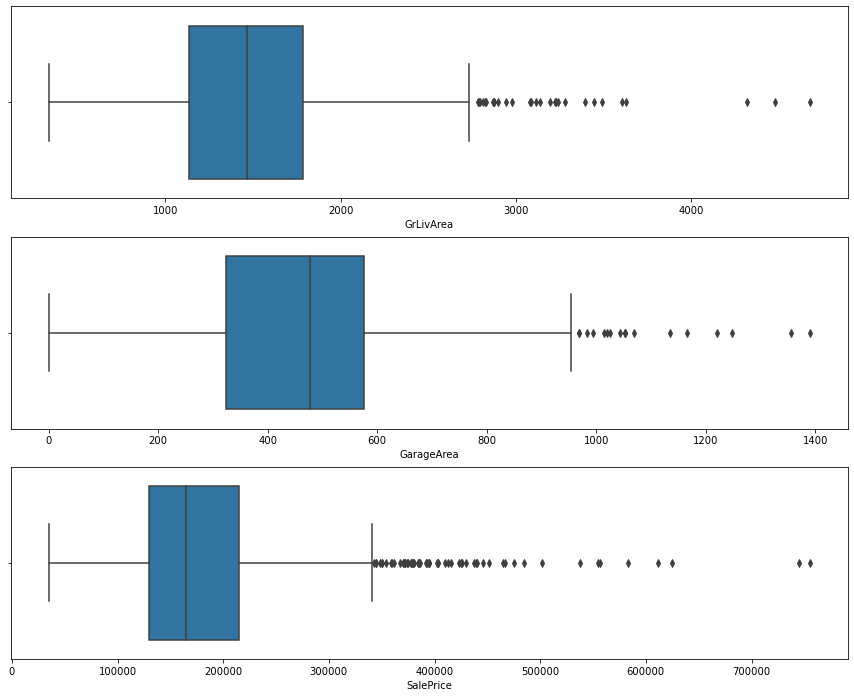

In [54]:
plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
sns.boxplot(data['GrLivArea'])
plt.subplot(3,1,2)
sns.boxplot(data['GarageArea'])
plt.subplot(3,1,3)
sns.boxplot(data['SalePrice'])
plt.show()

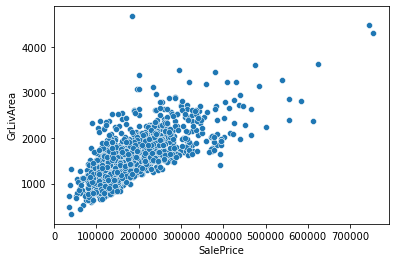

In [55]:
sns.scatterplot(x = 'SalePrice',y='GrLivArea',data=data)
plt.show()

In [56]:
data[data['SalePrice']>700000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [57]:
data[data['GrLivArea']>4000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [58]:
data.drop(index=[500],inplace=True)

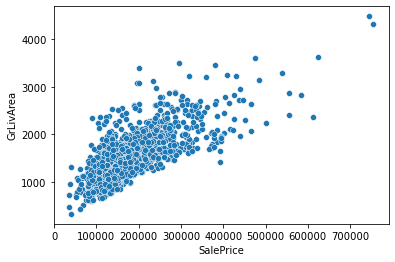

In [59]:
sns.scatterplot(x = 'SalePrice',y='GrLivArea',data=data)
plt.show()

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1416.0,709.257768,409.474995,1.0,354.75,709.5,1063.25,1418.0
OverallQual,1416.0,6.108757,1.379110,1.0,5.00,6.0,7.00,10.0
YearBuilt,1416.0,1971.550141,30.055196,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1416.0,1056.680791,412.794439,0.0,796.00,993.5,1302.00,3206.0
GrLivArea,1416.0,1514.504944,509.392098,334.0,1131.75,1467.0,1784.50,4476.0
FullBath,1416.0,1.564266,0.550073,0.0,1.00,2.0,2.00,3.0
GarageCars,1416.0,1.762712,0.755789,0.0,1.00,2.0,2.00,4.0
GarageArea,1416.0,471.659605,214.474979,0.0,323.50,478.0,576.00,1390.0
SalePrice,1416.0,182103.206921,80025.243732,34900.0,130000.00,164800.0,215000.00,755000.0


## Feature Selection

In [61]:
data.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
5,6,5,1993,796,SBrkr,1362,1,Attchd,2,480,143000
6,7,8,2004,1686,SBrkr,1694,2,Attchd,2,636,307000
7,8,7,1973,1107,SBrkr,2090,2,Attchd,2,484,200000
8,9,5,1939,991,SBrkr,1077,1,Detchd,1,205,118000
9,10,5,1965,1040,SBrkr,1040,1,Detchd,1,384,129500


In [62]:
# We need to drop GarageCars as there is multicolinearity between garage cars and garage area
data.drop(columns=['Id','GarageCars'],inplace=True)

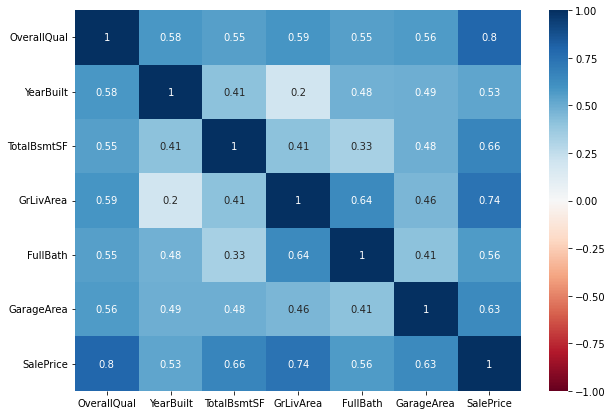

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, vmax=1,vmin=-1, cmap='RdBu')
plt.show()

## Feature Engineering

In [64]:
data.head(10)

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageArea,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,548,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,460,181500
2,7,2001,920,SBrkr,1786,2,Attchd,608,223500
3,7,1915,756,SBrkr,1717,1,Detchd,642,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,836,250000
5,5,1993,796,SBrkr,1362,1,Attchd,480,143000
6,8,2004,1686,SBrkr,1694,2,Attchd,636,307000
7,7,1973,1107,SBrkr,2090,2,Attchd,484,200000
8,5,1939,991,SBrkr,1077,1,Detchd,205,118000
9,5,1965,1040,SBrkr,1040,1,Detchd,384,129500


In [65]:
data = pd.get_dummies(data)

In [66]:
data.head(10)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,SalePrice,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,2003,856,1710,2,548,208500,0,0,0,0,1,0,1,0,0,0,0,0
1,6,1976,1262,1262,2,460,181500,0,0,0,0,1,0,1,0,0,0,0,0
2,7,2001,920,1786,2,608,223500,0,0,0,0,1,0,1,0,0,0,0,0
3,7,1915,756,1717,1,642,140000,0,0,0,0,1,0,0,0,0,0,1,0
4,8,2000,1145,2198,2,836,250000,0,0,0,0,1,0,1,0,0,0,0,0
5,5,1993,796,1362,1,480,143000,0,0,0,0,1,0,1,0,0,0,0,0
6,8,2004,1686,1694,2,636,307000,0,0,0,0,1,0,1,0,0,0,0,0
7,7,1973,1107,2090,2,484,200000,0,0,0,0,1,0,1,0,0,0,0,0
8,5,1939,991,1077,1,205,118000,0,0,0,0,1,0,0,0,0,0,1,0
9,5,1965,1040,1040,1,384,129500,0,0,0,0,1,0,0,0,0,0,1,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1417
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   OverallQual          1416 non-null   int64
 1   YearBuilt            1416 non-null   int64
 2   TotalBsmtSF          1416 non-null   int64
 3   GrLivArea            1416 non-null   int64
 4   FullBath             1416 non-null   int64
 5   GarageArea           1416 non-null   int64
 6   SalePrice            1416 non-null   int64
 7   Electrical_FuseA     1416 non-null   uint8
 8   Electrical_FuseF     1416 non-null   uint8
 9   Electrical_FuseP     1416 non-null   uint8
 10  Electrical_Mix       1416 non-null   uint8
 11  Electrical_SBrkr     1416 non-null   uint8
 12  GarageType_2Types    1416 non-null   uint8
 13  GarageType_Attchd    1416 non-null   uint8
 14  GarageType_Basment   1416 non-null   uint8
 15  GarageType_BuiltIn   1416 non-null   uint8
 16  GarageType_CarPort   141

## Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()

In [70]:
data_s = sc.fit_transform(data)

In [71]:
data_s

array([[ 0.6464733 ,  1.04677308, -0.48632363, ..., -0.07997868,
        -0.64498062, -0.24632125],
       [-0.07888818,  0.14810853,  0.49756423, ..., -0.07997868,
        -0.64498062, -0.24632125],
       [ 0.6464733 ,  0.98020533, -0.33122801, ..., -0.07997868,
        -0.64498062, -0.24632125],
       ...,
       [ 0.6464733 , -1.01682699,  0.23099363, ..., -0.07997868,
        -0.64498062, -0.24632125],
       [-0.80424967, -0.71727214,  0.05166431, ..., -0.07997868,
         1.55043418, -0.24632125],
       [-0.80424967, -0.21801406,  0.48302401, ..., -0.07997868,
        -0.64498062, -0.24632125]])

In [72]:
data_s = pd.DataFrame(data_s,columns=data.columns)

In [73]:
data_s.head(10)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,SalePrice,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,0.646473,1.046773,-0.486324,0.383917,0.792419,0.356067,0.329972,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
1,-0.078888,0.148109,0.497564,-0.495874,0.792419,-0.054383,-0.007540,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
2,0.646473,0.980205,-0.331228,0.533167,0.792419,0.635918,0.517479,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
3,0.646473,-1.882208,-0.728661,0.397663,-1.026163,0.794501,-0.526310,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,-1.137970,-0.116621,-0.254287,-0.079979,1.550434,-0.246321
4,1.371835,0.946921,0.214030,1.342260,0.792419,1.699355,0.848742,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
5,-0.804250,0.713934,-0.631726,-0.299492,-1.026163,0.038901,-0.488809,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
6,1.371835,1.080057,1.525073,0.352496,0.792419,0.766516,1.561269,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
7,0.646473,0.048257,0.121942,1.130167,0.792419,0.057558,0.223718,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
8,-0.804250,-1.083395,-0.159169,-0.859180,-1.026163,-1.243753,-0.801320,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,-1.137970,-0.116621,-0.254287,-0.079979,1.550434,-0.246321
9,-0.804250,-0.218014,-0.040424,-0.931841,-1.026163,-0.408862,-0.657565,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,-1.137970,-0.116621,-0.254287,-0.079979,1.550434,-0.246321


# Train Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [76]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1413    175000
1414    210000
1415    266500
1416    142125
1417    147500
Name: SalePrice, Length: 1416, dtype: int64

In [77]:
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.7)

In [78]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(991, 18) (425, 18) (991,) (425,)


## Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [80]:
model = LinearRegression()

In [81]:
model.fit(x_train,y_train)

LinearRegression()

In [82]:
# y = b0 + b1x1 + b2x2 + b3x3....b18x18

In [83]:
model.coef_

array([ 1.63622994e+04,  3.73734627e+02,  4.62370727e+01,  6.89440310e+01,
       -8.72408803e+03,  5.72662605e+01, -3.41406235e+03,  3.16441193e+03,
        4.16722068e+03, -3.63797881e-12, -3.91757026e+03, -4.17497859e+04,
        6.55948275e+03,  2.08740464e+03,  2.09056251e+04, -2.37680022e+04,
        8.53214634e+03,  2.74331293e+04])

In [84]:
model.intercept_

-826439.334229301

In [85]:
y_pred = model.predict(x_test)

In [86]:
resid = y_test-y_pred
pd.DataFrame({'Actual Y':y_test,'Predicted Y':y_pred,'Residual':resid}).head(20)

,Actual Y,Predicted Y,Residual
249,120500,117075.741843,3424.258157
80,123600,113057.473264,10542.526736
984,187500,222394.933523,-34894.933523
471,172785,165250.184258,7534.815742
474,34900,54805.720775,-19905.720775
1130,233170,234004.853217,-834.853217
262,185000,184754.714279,245.285721
699,120500,108469.772148,12030.227852
687,129000,114716.792223,14283.207777
525,125000,118169.964747,6830.035253


In [87]:
SSE = sum(resid**2)

In [88]:
SSE # Sum(yi - y^)**2  LOSS FUNCTION

420300869250.8206

In [89]:
SAE = sum(resid.abs()) # Sum of absolute errors

In [90]:
SAE

10024605.104503445

In [91]:
# Validation

In [92]:
def Validation(test,pred,data):
    r2 = r2_score(test,pred)
    n = data.shape[0]
    k = data.shape[1]
    adj_r2 = 1-(((n-1)/(n-k-1))*(1-r2))
    
    print('R square:',r2)
    print('Adj R square:',adj_r2)
    print('MSE:',mean_squared_error(test,pred))
    print('RMSE:',(mean_squared_error(test,pred))**0.5)
    print('MAPE:',mean_absolute_percentage_error(test,pred))
    

In [93]:
Validation(y_test,y_pred,data)

R square: 0.8247240442905083
Adj R square: 0.8223384832887315
MSE: 988943221.7666372
RMSE: 31447.46765268449
MAPE: 0.1493471069816083


## Statsmodel

In [94]:
import statsmodels.api as sm

In [95]:
model_stat= sm.OLS(y,x)
result = model_stat.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     408.8
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:41:43   Log-Likelihood:                -16766.
No. Observations:                1416   AIC:                         3.357e+04
Df Residuals:                    1399   BIC:                         3.366e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
OverallQual          1.794e+04   1

In [96]:
# Durbin-watson test
#The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the 
# residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. 
#This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence 
#for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.
# Test for autocorelation
# 2 ---> No Autocorrelation (Homoscedastic)
# 0-2 ---> Pos Autocorrelation (Hetroscedastic)
# 2-4 ---> Neg Autocorrelation (Hetroscadestic)

In [97]:
#The Jarque-Bera test statistic tests the null that the data is normally distributed against an 
#alternative that the data follow some other distribution.
# Prob(JB) >0.025 and <0.975
# Residuals are normally distributed

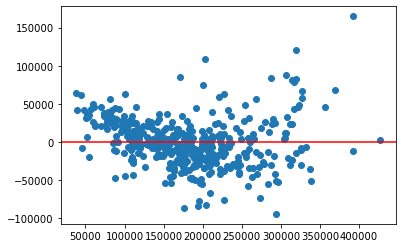

In [98]:
plt.scatter(x=y_pred,y=resid)
plt.axhline(y=0,color='r')
plt.show()

Althought the r2 value (score) is above 80% but the model is not reliable for this dataset as it is violating the assumptions of linear regression. The residuals in the data set are not normal. (this is confirmed by Jaraque-bera test and the plot above)

## Test for overfit

In [99]:
y_pred_train = model.predict(x_train)

In [100]:
Validation(y_train,y_pred_train,data)

R square: 0.8207300769271895
Adj R square: 0.8182901567707543
MSE: 1204382839.7537007
RMSE: 34704.219336468304
MAPE: 0.1447287530982061


In [101]:
Validation(y_test,y_pred,data)

R square: 0.8247240442905083
Adj R square: 0.8223384832887315
MSE: 988943221.7666372
RMSE: 31447.46765268449
MAPE: 0.1493471069816083


## Regularization

### Ridge Regression

In [102]:
from sklearn.linear_model import Ridge,Lasso

In [103]:
model_ridge = Ridge(alpha=5)

In [104]:
model_ridge.fit(x_train,y_train)

Ridge(alpha=5)

In [105]:
y_pred_ridge = model_ridge.predict(x_test)

In [106]:
Validation(y_test,y_pred_ridge,data)

R square: 0.8271297786538425
Adj R square: 0.8247769604550051
MSE: 975369570.535582
RMSE: 31230.907296067817
MAPE: 0.14733334733070058


In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param = {'alpha':[0.001,0.01,0.1,1,10,100,500]}

In [109]:
gscv = GridSearchCV(estimator=Ridge(),
                   param_grid=param,
                   scoring='r2',
                   cv=3,
                   verbose=3)

In [110]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [111]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END .......................alpha=0.001;, score=0.802 total time=   0.0s
[CV 2/3] END .......................alpha=0.001;, score=0.808 total time=   0.0s
[CV 3/3] END .......................alpha=0.001;, score=0.816 total time=   0.0s
[CV 1/3] END ........................alpha=0.01;, score=0.802 total time=   0.0s
[CV 2/3] END ........................alpha=0.01;, score=0.808 total time=   0.0s
[CV 3/3] END ........................alpha=0.01;, score=0.817 total time=   0.0s
[CV 1/3] END .........................alpha=0.1;, score=0.802 total time=   0.0s
[CV 2/3] END .........................alpha=0.1;, score=0.808 total time=   0.0s
[CV 3/3] END .........................alpha=0.1;, score=0.817 total time=   0.0s
[CV 1/3] END ...........................alpha=1;, score=0.803 total time=   0.0s
[CV 2/3] END ...........................alpha=1;, score=0.809 total time=   0.0s
[CV 3/3] END ...........................alpha=1;,

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 500]},
             scoring='r2', verbose=3)

In [112]:
gscv.best_params_

{'alpha': 10}

In [113]:
gscv.best_score_

0.8097025596158689

In [114]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [118]:
params = {'criterion': ['Squared_error','absolute_error'],'max_dept':[4.5,6,7,8]}
gscv = GridSearchCV(estimator=dt_model,param_grid=param,scoring='r2',verbose=3)